<a href="https://colab.research.google.com/github/ravindranaithani/classification.ipynb/blob/main/MLP_week_5_graded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [52]:
X,y = fetch_openml('mnist_784',version=1,return_X_y=True,as_frame=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [53]:
X.shape,y.shape,type(X),type(y)

((70000, 784),
 (70000,),
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [54]:
y = y.astype('int')

In [55]:
y.dtype

dtype('int64')

# Instruction for graded question<br>
1:From the MNIST dataset, create a new dataset by taking first 10000 images for training and next 2000 images for testing.

2:Collect all digit-5 (Positive class) and digit-3 (Negative class) images and stack them properly as a single datamatrix.

3:By convention, keep all digit-5 images from index 0 to i followed by digit-3 images from index i+1 to n (i denotes the end index of digit-5 images)
Similarly, collect the respective labels and store it in a variable (Do sanity check).

4:Set the label values to 1 for positive class and -1 for negative class.

5:Instantiate a perceptron classifier with the below parameters
random_state = 42
learning rate = 1
Train for 100 iterations (epoch)
Should shuffle the dataset for each epoch (iteration)
Include the intercept (bias) term.
No regularization
Use the training set for fitting the perceptron model and use the test data to make the predictions. Answer the below questions.

In [56]:
X_train,y_train = X.iloc[:10000,:],y[:10000]
X_test,y_test  = X.iloc[10000:12000,:],y[10000:12000]

In [57]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((10000, 784), (10000,), (2000, 784), (2000,))

In [58]:
unique,count = np.unique(y_train,return_counts = True)
print(unique,count)

[0 1 2 3 4 5 6 7 8 9] [1001 1127  991 1032  980  863 1014 1070  944  978]


In [59]:
train_image_5 = X_train[y_train == 5]
train_image_3 =X_train[y_train == 3]
digit_5_level = np.ones(len(train_image_5))
digit_3_level = -1*np.ones(len(train_image_3))
X_train_new = pd.concat([train_image_5,train_image_3],axis=0,ignore_index= True)
y_train_new = np.concatenate([digit_5_level,digit_3_level])
print(X_train_new.shape,y_train_new.shape)

#..................................................
test_image_5 = X_test[y_test ==5]
test_image_3 = X_test[y_test ==3]
digit5_test_level = np.ones(len(test_image_5))
digit3_test_level = -1*np.ones(len(test_image_3))
X_test_new = pd.concat([test_image_5,test_image_3],axis = 0,ignore_index=True)
y_test_new= np.concatenate([digit5_test_level,digit3_test_level])
print(X_test_new.shape,y_test_new.shape)

(1895, 784) (1895,)
(381, 784) (381,)


In [60]:
from sklearn.linear_model import Perceptron
import sklearn.metrics as skm
from sklearn.

SyntaxError: ignored

In [61]:
clf = Perceptron(random_state = 42,eta0=1,max_iter=100,
                 shuffle = True,penalty = None,fit_intercept= True)

In [62]:
clf.fit(X_train_new,y_train_new)

Perceptron(eta0=1, max_iter=100, random_state=42)

In [63]:
y_pred = clf.predict(X_test_new)

In [64]:
cm = skm.confusion_matrix(y_test_new,y_pred)
cm

array([[190,   6],
       [ 12, 173]])

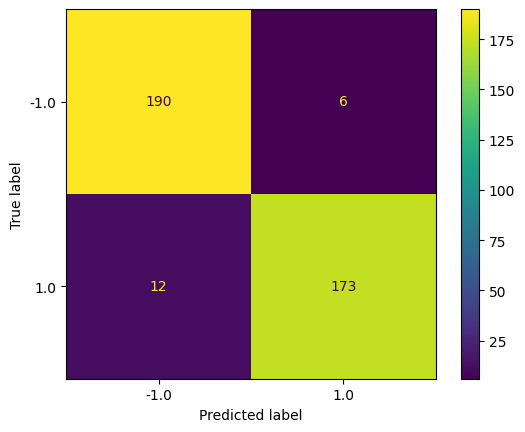

In [65]:
display = skm.ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
display.plot()
plt.show()

In [66]:
accuracy = skm.accuracy_score(y_test_new,y_pred)
print(f'Accuracy in percentage:{accuracy*100:.3f}')
accuracy

Accuracy in percentage:95.276


0.952755905511811

In [67]:
report = skm.classification_report(y_test_new,y_pred,target_names =['class-1','class+1'])
print(report)

              precision    recall  f1-score   support

     class-1       0.94      0.97      0.95       196
     class+1       0.97      0.94      0.95       185

    accuracy                           0.95       381
   macro avg       0.95      0.95      0.95       381
weighted avg       0.95      0.95      0.95       381



In [68]:
clf.score(X_test_new,y_test_new)

0.952755905511811

In [79]:
type(clf.coef_),clf.coef_[0][525]

(numpy.ndarray, 543.0)